In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hermellaberhanu","key":"a88569eb149ed70ab8072b9ecf8f2f06"}'}

In [9]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
!cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/ kaggle.json

In [15]:
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                           Car Price Dataset                                   135KB  2025-01-26 19:53:28           9496        123  1.0              
anandshaw2001/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                           1MB  2025-01-03 10:33:01          18293        464  1.0              
samithsachidanandan/most-popular-1000-youtube-videos               Most popular 1000 Youtube videos                     42KB  2025-01-27 18:36:29           2576         47  1.0              
adilshamim8/education-and-career-success     

In [14]:
!kaggle datasets download -d jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
 97% 569M/587M [00:04<00:00, 148MB/s]
100% 587M/587M [00:04<00:00, 130MB/s]


In [16]:
! unzip weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [17]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import mixed_precision

In [18]:
# Enable mixed precision training
mixed_precision.set_global_policy('mixed_float16')

In [19]:
# Data paths
root_path = '/content/dataset'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

In [20]:
# Data generators
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)
train_generator = datagen.flow_from_directory(root_path, target_size=(256,256), class_mode="categorical", subset='training', shuffle=True, batch_size=32)
valid_generator = datagen.flow_from_directory(root_path, target_size=(256,256), class_mode="categorical", subset='validation', shuffle=True, batch_size=32)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [21]:
# Transfer Learning Model
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3))
base_model.trainable = False


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [22]:
# Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation="softmax")
])


In [23]:
# Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('resnet_optimized.h5', save_best_only=True)
]

In [25]:
# Training
history = model.fit(train_generator, epochs=10, callbacks=callbacks, validation_data=valid_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.5338 - loss: 1.3870

172/172 ━━━━━━━━━━━━━━━━━━━━ 191s 912ms/step - accuracy: 0.5346 - loss: 1.3846 - val_accuracy: 0.8335 - val_loss: 0.4821
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.8282 - loss: 0.5266

172/172 ━━━━━━━━━━━━━━━━━━━━ 120s 696ms/step - accuracy: 0.8282 - loss: 0.5266 - val_accuracy: 0.8400 - val_loss: 0.4637
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.8463 - loss: 0.4542

172/172 ━━━━━━━━━━━━━━━━━━━━ 122s 708ms/step - accuracy: 0.8463 - loss: 0.4543 - val_accuracy: 0.8612 - val_loss: 0.4120
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8770 - loss: 0.3643

172/172 ━━━━━━━━━━━━━━━━━━━━ 119s 694ms/step - accuracy: 0.8770 - loss: 0.3644 - val_accuracy: 0.8649 - val_loss: 0.3958
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 117s 682ms/step - accuracy: 0.8859 - loss: 0.3253 - val_accuracy: 0.8634 - val_loss: 0.4273
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 117s 681ms/step - accuracy: 0.9004 - loss: 0.2821 - val_accuracy: 0.8722 - val_loss: 0.4104
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 115s 672ms/step - accuracy: 0.9118 - loss: 0.2750 - val_accuracy: 0.8758 - val_loss: 0.4135
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 117s 683ms/step - accuracy: 0.9125 - loss: 0.2635 - val_accuracy: 0.8663 - val_loss: 0.4332
Epoch 9/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 119s 691ms/step - accuracy: 0.9089 - loss: 0.2571 - val_accuracy: 0.8685 - val_loss: 0.4353


In [26]:
# Evaluation
model.evaluate(valid_generator)

43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 516ms/step - accuracy: 0.8614 - loss: 0.4385


[0.4020812511444092, 0.8692476153373718]

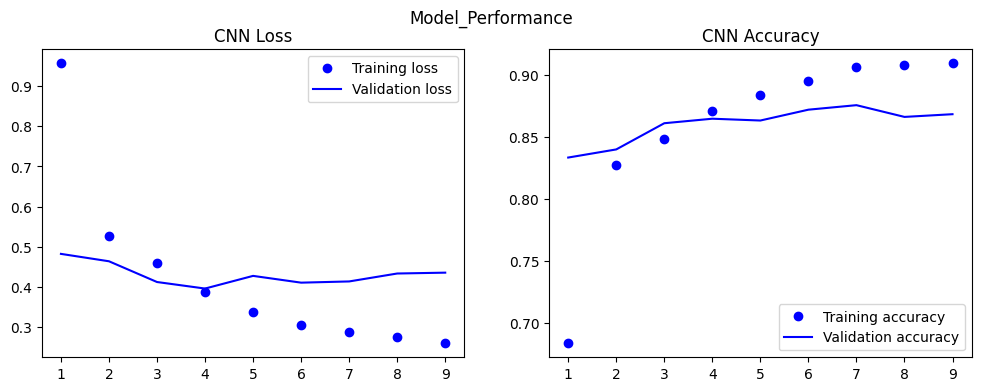

In [27]:
import matplotlib.pyplot as plt
# Visualize the training and validation loss and accuracy
def plot_history(history, history_title='', exp_name='', axs=None):
    if axs is None:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig = None

    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    acc_train = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    epochs = range(1, len(loss_train) + 1)

    axs[0].plot(epochs, loss_train, 'bo', label='Training loss')
    axs[0].plot(epochs, loss_val, 'b', label='Validation loss')
    axs[0].set_title(f'{exp_name} Loss')
    axs[0].legend()

    axs[1].plot(epochs, acc_train, 'bo', label='Training accuracy')
    axs[1].plot(epochs, acc_val, 'b', label='Validation accuracy')
    axs[1].set_title(f'{exp_name} Accuracy')
    axs[1].legend()

    if fig is not None:
         fig.suptitle(history_title)
         plt.show()


plot_history(history, history_title='Model_Performance', exp_name='CNN', axs=None)

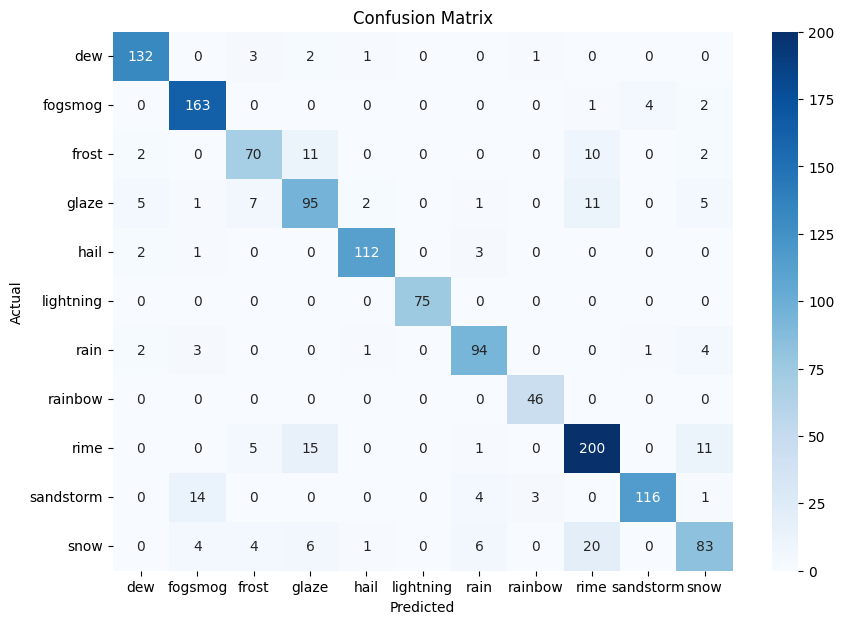

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the generator
valid_generator.reset()

# Collect true labels and predictions
true_labels = []
predictions = []

for i in range(len(valid_generator)):
    x, y = next(valid_generator)
    preds = model.predict_on_batch(x)

    if len(y.shape) > 1 and y.shape[1] > 1:
        true_labels.extend(np.argmax(y, axis=1))
    else:
        true_labels.extend(y)

    predictions.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)
class_names = list(valid_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()